In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot



In [2]:
data = pd.read_csv("world-happiness-report-2021.csv")
display(data)



,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [3]:
data2 = pd.read_csv("world-happiness-report.csv")
display(data2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


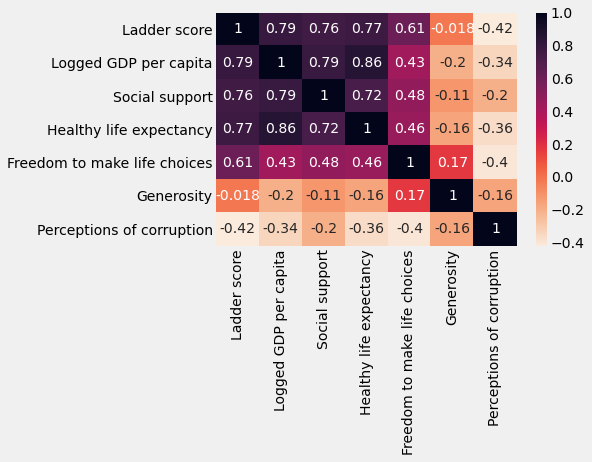

In [7]:
flt = data.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis = 1)

sns.heatmap(flt.corr(), cmap = "rocket_r", annot = True)

In [8]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Ladder score', y_column = 'Social support', 
    bubble_column = 'Country name', size_column = 'Logged GDP per capita', color_column = 'Regional indicator', 
    x_title = "Ladder score", y_title = "Social support", title = 'Happiness vs Social support vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [9]:
trace1 = [go.Choropleth(
               colorscale = 'Viridis',
               locationmode = 'country names',
               locations = data['Country name'],
               text = data['Country name'], 
               z = data['Ladder score'],
               )]

layout = dict(title = 'Ladder score',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "natural earth", "equirectangular", "mercator", "orthographic", "robinson"]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]

annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

In [10]:
data[['Country name','Ladder score']].head(10)

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
5,Norway,7.392
6,Sweden,7.363
7,Luxembourg,7.324
8,New Zealand,7.277
9,Austria,7.268
